In [337]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from datetime import datetime

In [338]:
start_year = 2004
end_year = 2020
full_data = pd.DataFrame()
for year in range(start_year, end_year+1):
    df = pd.read_csv(os.path.join("data",f"lbj_data_{year}.csv"))
    if full_data.empty:
        full_data = df
    else:
        full_data = pd.concat([full_data,df],ignore_index=True)
full_data.head()

,G,Date,Age,Tm,game_location,Opp,game_result,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1.0,2003-10-29,18-303,CLE,@,SAC,L (-14),1.0,42:50,12.0,...,4.0,6.0,9.0,4.0,0.0,2.0,3.0,25.0,24.7,-9.0
1,2.0,2003-10-30,18-304,CLE,@,PHO,L (-9),1.0,40:21,8.0,...,10.0,12.0,8.0,1.0,0.0,7.0,1.0,21.0,14.7,-3.0
2,3.0,2003-11-01,18-306,CLE,@,POR,L (-19),1.0,39:10,3.0,...,4.0,4.0,6.0,2.0,0.0,2.0,3.0,8.0,5.0,-21.0
3,4.0,2003-11-05,18-310,CLE,NaN,DEN,L (-4),1.0,41:06,3.0,...,9.0,11.0,7.0,2.0,3.0,2.0,1.0,7.0,11.2,-3.0
4,5.0,2003-11-07,18-312,CLE,@,IND,L (-1),1.0,43:44,8.0,...,5.0,5.0,3.0,0.0,0.0,7.0,2.0,23.0,9.0,-7.0


In [339]:
full_data["game_location"].fillna("home",inplace=True)

In [340]:
def extract_date(date_str):
    return datetime.strptime(date_str,"%Y-%m-%d")

In [341]:
full_data["Date"] = full_data["Date"].apply(lambda x: extract_date(x))
print(type(full_data["Date"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [342]:
full_data

,G,Date,Age,Tm,game_location,Opp,game_result,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1.0,2003-10-29,18-303,CLE,@,SAC,L (-14),1.0,42:50,12.0,...,4.0,6.0,9.0,4.0,0.0,2.0,3.0,25.0,24.7,-9.0
1,2.0,2003-10-30,18-304,CLE,@,PHO,L (-9),1.0,40:21,8.0,...,10.0,12.0,8.0,1.0,0.0,7.0,1.0,21.0,14.7,-3.0
2,3.0,2003-11-01,18-306,CLE,@,POR,L (-19),1.0,39:10,3.0,...,4.0,4.0,6.0,2.0,0.0,2.0,3.0,8.0,5.0,-21.0
3,4.0,2003-11-05,18-310,CLE,home,DEN,L (-4),1.0,41:06,3.0,...,9.0,11.0,7.0,2.0,3.0,2.0,1.0,7.0,11.2,-3.0
4,5.0,2003-11-07,18-312,CLE,@,IND,L (-1),1.0,43:44,8.0,...,5.0,5.0,3.0,0.0,0.0,7.0,2.0,23.0,9.0,-7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,58.0,2020-03-06,35-067,LAL,home,MIL,W (+10),1.0,36:30,12.0,...,8.0,8.0,8.0,3.0,0.0,4.0,4.0,37.0,31.3,8.0
1256,59.0,2020-03-08,35-069,LAL,@,LAC,W (+9),1.0,34:31,7.0,...,6.0,8.0,9.0,0.0,2.0,2.0,3.0,28.0,25.8,7.0
1257,60.0,2020-03-10,35-071,LAL,home,BRK,L (-2),1.0,34:52,12.0,...,11.0,12.0,9.0,1.0,0.0,3.0,1.0,29.0,24.7,8.0
1258,61.0,2020-07-30,35-213,LAL,home,LAC,W (+2),1.0,34:18,6.0,...,9.0,11.0,7.0,1.0,1.0,5.0,3.0,16.0,9.6,-4.0


In [343]:
game_location_le = LabelEncoder()
gl_le = game_location_le.fit_transform(full_data["game_location"])
gl_le

array([0, 0, 0, ..., 1, 1, 0])

In [344]:
full_data["game_location"] = gl_le

In [345]:
full_data.head()

,G,Date,Age,Tm,game_location,Opp,game_result,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1.0,2003-10-29,18-303,CLE,0,SAC,L (-14),1.0,42:50,12.0,...,4.0,6.0,9.0,4.0,0.0,2.0,3.0,25.0,24.7,-9.0
1,2.0,2003-10-30,18-304,CLE,0,PHO,L (-9),1.0,40:21,8.0,...,10.0,12.0,8.0,1.0,0.0,7.0,1.0,21.0,14.7,-3.0
2,3.0,2003-11-01,18-306,CLE,0,POR,L (-19),1.0,39:10,3.0,...,4.0,4.0,6.0,2.0,0.0,2.0,3.0,8.0,5.0,-21.0
3,4.0,2003-11-05,18-310,CLE,1,DEN,L (-4),1.0,41:06,3.0,...,9.0,11.0,7.0,2.0,3.0,2.0,1.0,7.0,11.2,-3.0
4,5.0,2003-11-07,18-312,CLE,0,IND,L (-1),1.0,43:44,8.0,...,5.0,5.0,3.0,0.0,0.0,7.0,2.0,23.0,9.0,-7.0


In [346]:
full_data["G"] = full_data["G"].apply(lambda x: int(x))

In [347]:
def get_game_result(result):
    num_str = result.split("(")[1].replace(")","")
    return int(num_str)

In [348]:
full_data["game_result"] = full_data["game_result"].apply(lambda x: get_game_result(x))

In [349]:
corr = full_data.corr()

In [350]:
corr

,G,game_location,game_result,GS,FG,FGA,FG%,3P,3PA,3P%,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
G,1.000000,-0.001198,-0.016051,0.026850,0.073603,0.092563,0.018714,0.031439,0.071311,-0.005435,...,0.052755,0.065695,0.011636,-0.001101,-0.030392,-0.033979,-0.013911,0.084495,0.073385,-0.005161
game_location,-0.001198,1.000000,0.251329,-0.027916,-0.074293,-0.168173,0.090496,-0.062342,-0.121905,0.025624,...,-0.021628,-0.029251,0.055160,-0.033807,0.040271,-0.076831,-0.139763,-0.071252,0.028239,0.213690
game_result,-0.016051,0.251329,1.000000,-0.018481,0.068655,-0.171348,0.318941,0.049466,-0.103806,0.140942,...,0.067341,0.039550,0.146114,0.057087,0.055268,-0.193443,-0.109256,0.067962,0.272919,0.855446
GS,0.026850,-0.027916,-0.018481,1.000000,0.044701,0.062442,-0.012793,0.029305,0.038779,0.035937,...,0.044093,0.041441,0.022352,0.012988,-0.007587,-0.007694,-0.003553,0.036337,0.032957,-0.047900
FG,0.073603,-0.074293,0.068655,0.044701,1.000000,0.742831,0.607731,0.406205,0.347853,0.272123,...,0.086195,0.127941,-0.049304,0.101037,0.026923,0.041360,0.087909,0.886695,0.741585,0.092300
FGA,0.092563,-0.168173,-0.171348,0.062442,0.742831,1.000000,-0.048498,0.299069,0.450013,0.053474,...,0.099683,0.191650,-0.052952,0.101970,0.062949,0.024637,0.133312,0.703562,0.413711,-0.128945
FG%,0.018714,0.090496,0.318941,-0.012793,0.607731,-0.048498,1.000000,0.232638,-0.015109,0.350009,...,0.023070,-0.017017,-0.002984,0.031790,-0.015376,0.033987,-0.027403,0.491272,0.611742,0.296284
3P,0.031439,-0.062342,0.049466,0.029305,0.406205,0.299069,0.232638,1.000000,0.765701,0.717263,...,0.033484,0.031488,0.014281,-0.018299,-0.006678,0.052935,0.067786,0.498138,0.419588,0.060986
3PA,0.071311,-0.121905,-0.103806,0.038779,0.347853,0.450013,-0.015109,0.765701,1.000000,0.259461,...,0.106947,0.111328,0.084627,-0.009548,0.021494,0.113424,0.097381,0.443870,0.297917,-0.075778
3P%,-0.005435,0.025624,0.140942,0.035937,0.272123,0.053474,0.350009,0.717263,0.259461,1.000000,...,-0.008328,-0.012131,-0.041406,-0.044224,-0.012417,0.029036,0.021069,0.324299,0.320635,0.128010


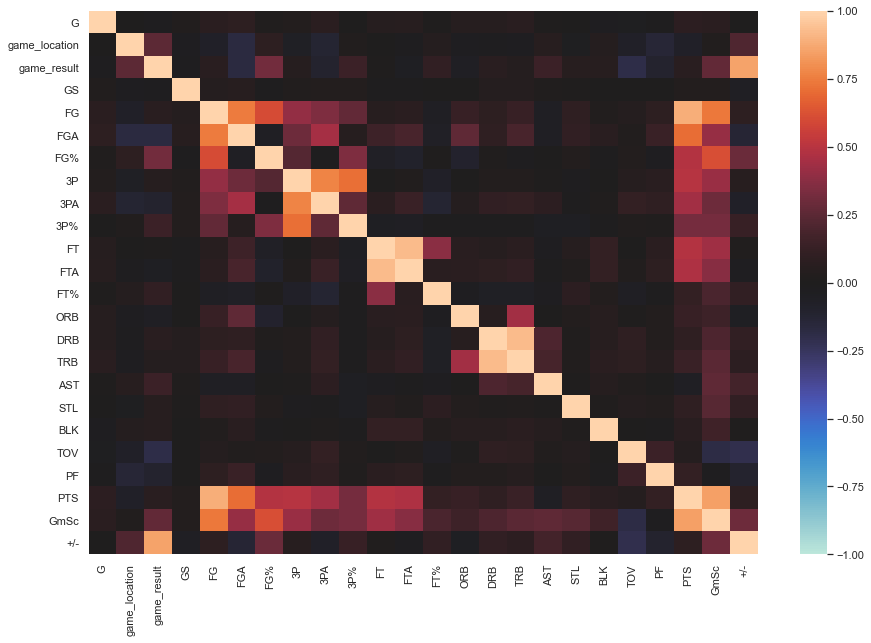

In [351]:
plt.figure(1,(15,10))
sns.heatmap(corr,vmin=-1,center=0,vmax=1)
plt.show()

In [352]:
def correlation_w_threshold(corr,threshold,target_col):
    corr_plus_minus = corr.loc[target_col,:]
    corr_plus_minus_above_thres = corr_plus_minus[(corr_plus_minus>=threshold) | (corr_plus_minus<=-threshold)]
    return corr_plus_minus_above_thres.values.reshape(-1,1), corr_plus_minus_above_thres.index

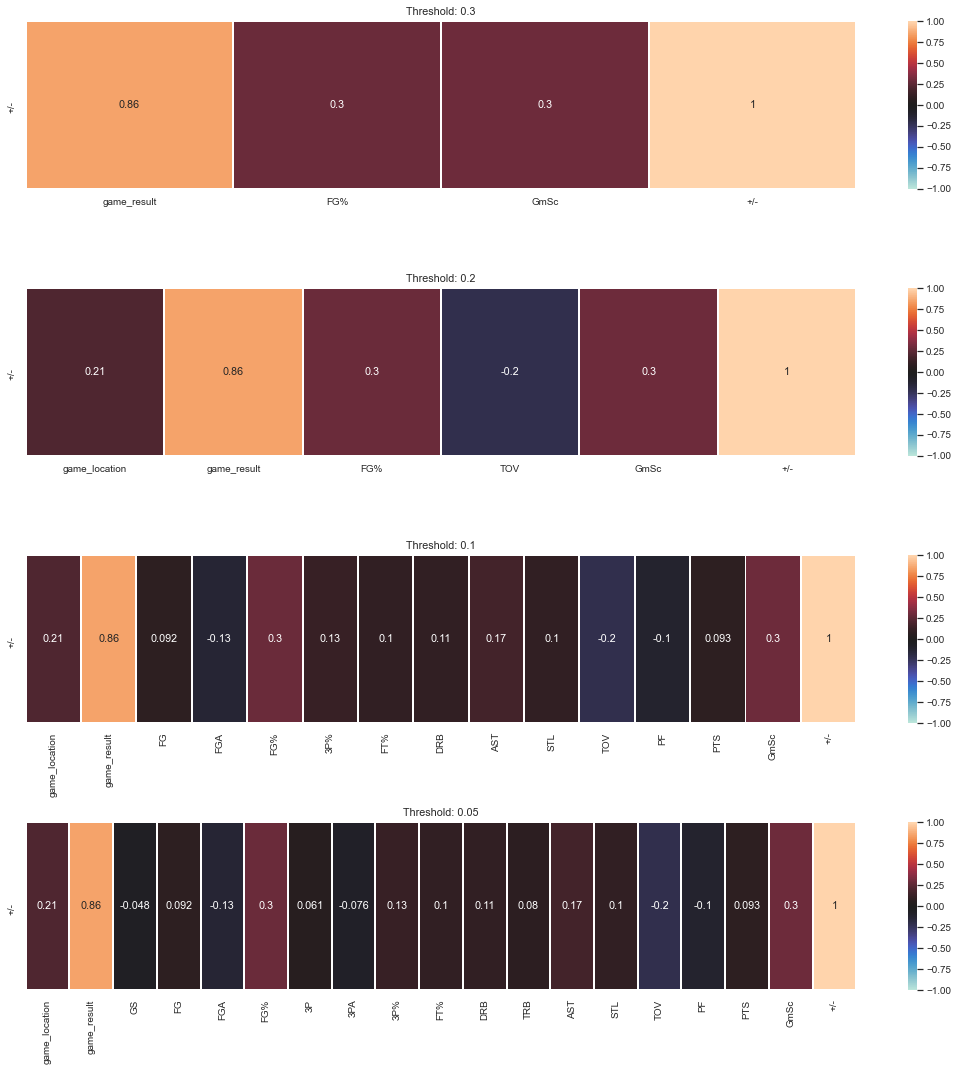

In [353]:
sns.set(font_scale=0.9)
plt.figure(1,(15,15))
i = 0
epsilon = 0.01
for thres in [0.3,0.2,0.1,0.05]:
    i += 1
    ax = plt.subplot(4,1,i)
    corr_above_thres, corr_above_thres_cols = correlation_w_threshold(corr,thres-epsilon,"+/-")
    sns.heatmap(corr_above_thres.T,vmin=-1,vmax=1,center=0,linewidth=1,annot=True,yticklabels=["+/-"],xticklabels=corr_above_thres_cols)
    ax.set_title(f"Threshold: {thres}")
    plt.tight_layout()
plt.show()

<h2>Advanced Basketball Statistics</h2>
<ul>
    <li>True Shooting Percentage (TS%) = Pts / (2 * (FGA + .475 * FTA))</li>
    <li>Free Throw Rate (FTR) = FT / FGA
</li>
    <li>Hollinger Assist Ratio (hAST%) = AST / (FGA + .475 * FTA + AST + TOV)</li>
    <li>Turnover Percentage (TOV%) = TOV / (FGA + .475*FTA + AST + TOV)</li>
    <li>Assist to Turnover Ratio (AST-TOV) = Assists / Turnover</li>
    <li>Defensive Rebound Percentage (DREB%) = DRB / TRB</li>
    <li>Offensive Rebound Percentage (OREB%) = ORB / TRB</li>
    <li>Possessions (POSS) = FGA + 0.44 × FTA – OREB + TO
</ul>

In [354]:
full_data["TS%"] = full_data["PTS"] / (2*(full_data["FGA"] + (0.475*full_data["FTA"])))
full_data["FTR"] = full_data["FT"] / full_data["FGA"]
full_data["hAST%"] = full_data["AST"] / (full_data["FGA"]+(0.475*full_data["FTA"])+full_data["AST"]+full_data["TOV"])
full_data["TOV%"] = full_data["TOV"] / (full_data["FGA"] + .475*full_data["FTA"] + full_data["AST"] + full_data["TOV"])
full_data["AST-TOV"] = full_data["AST"] / full_data["TOV"]
full_data["DREB%"] = full_data["DRB"] / full_data["TRB"]
full_data["OREB%"] = full_data["ORB"] / full_data["TRB"]
full_data["POSS"] = full_data["FGA"] + (0.44*full_data["FTA"]) - full_data["ORB"] + full_data["TOV"]

In [355]:
min_year = full_data["Date"][0].year

In [356]:
def get_year_num(dt):
    return dt.year - min_year + 1

In [357]:
full_data["Year_Number"] = full_data["Date"].apply(lambda x: get_year_num(x))

In [358]:
corr = full_data.corr()

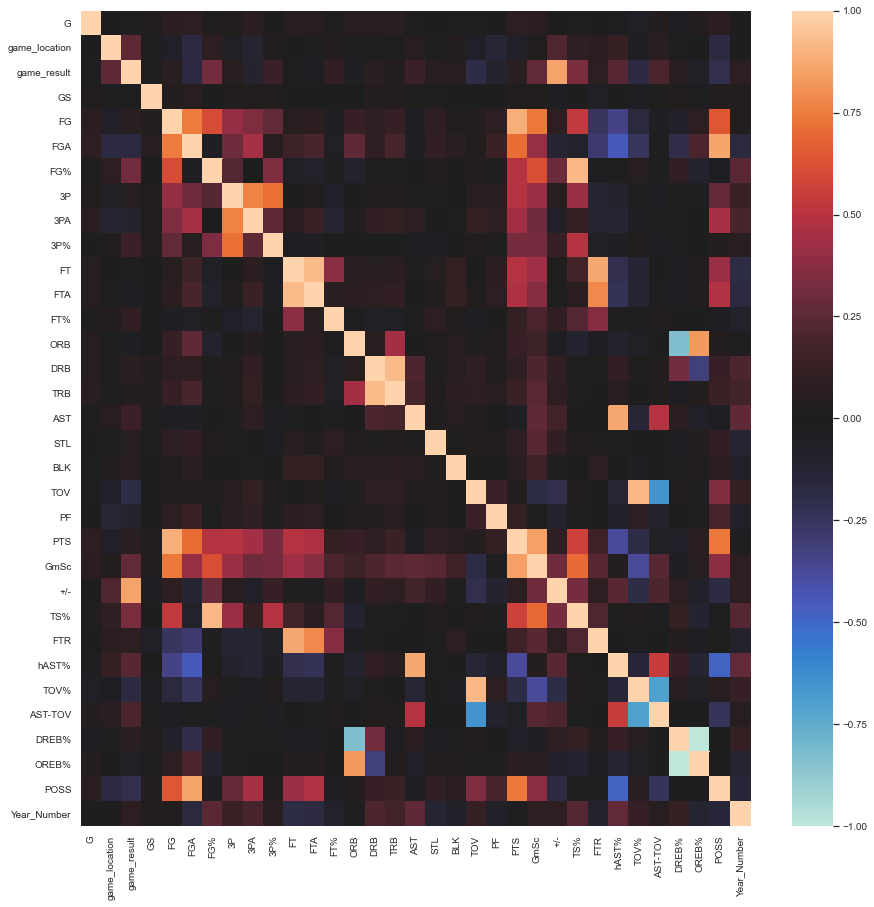

In [359]:
plt.figure(1,(15,15))
sns.heatmap(corr,vmin=-1,center=0,vmax=1)
plt.show()

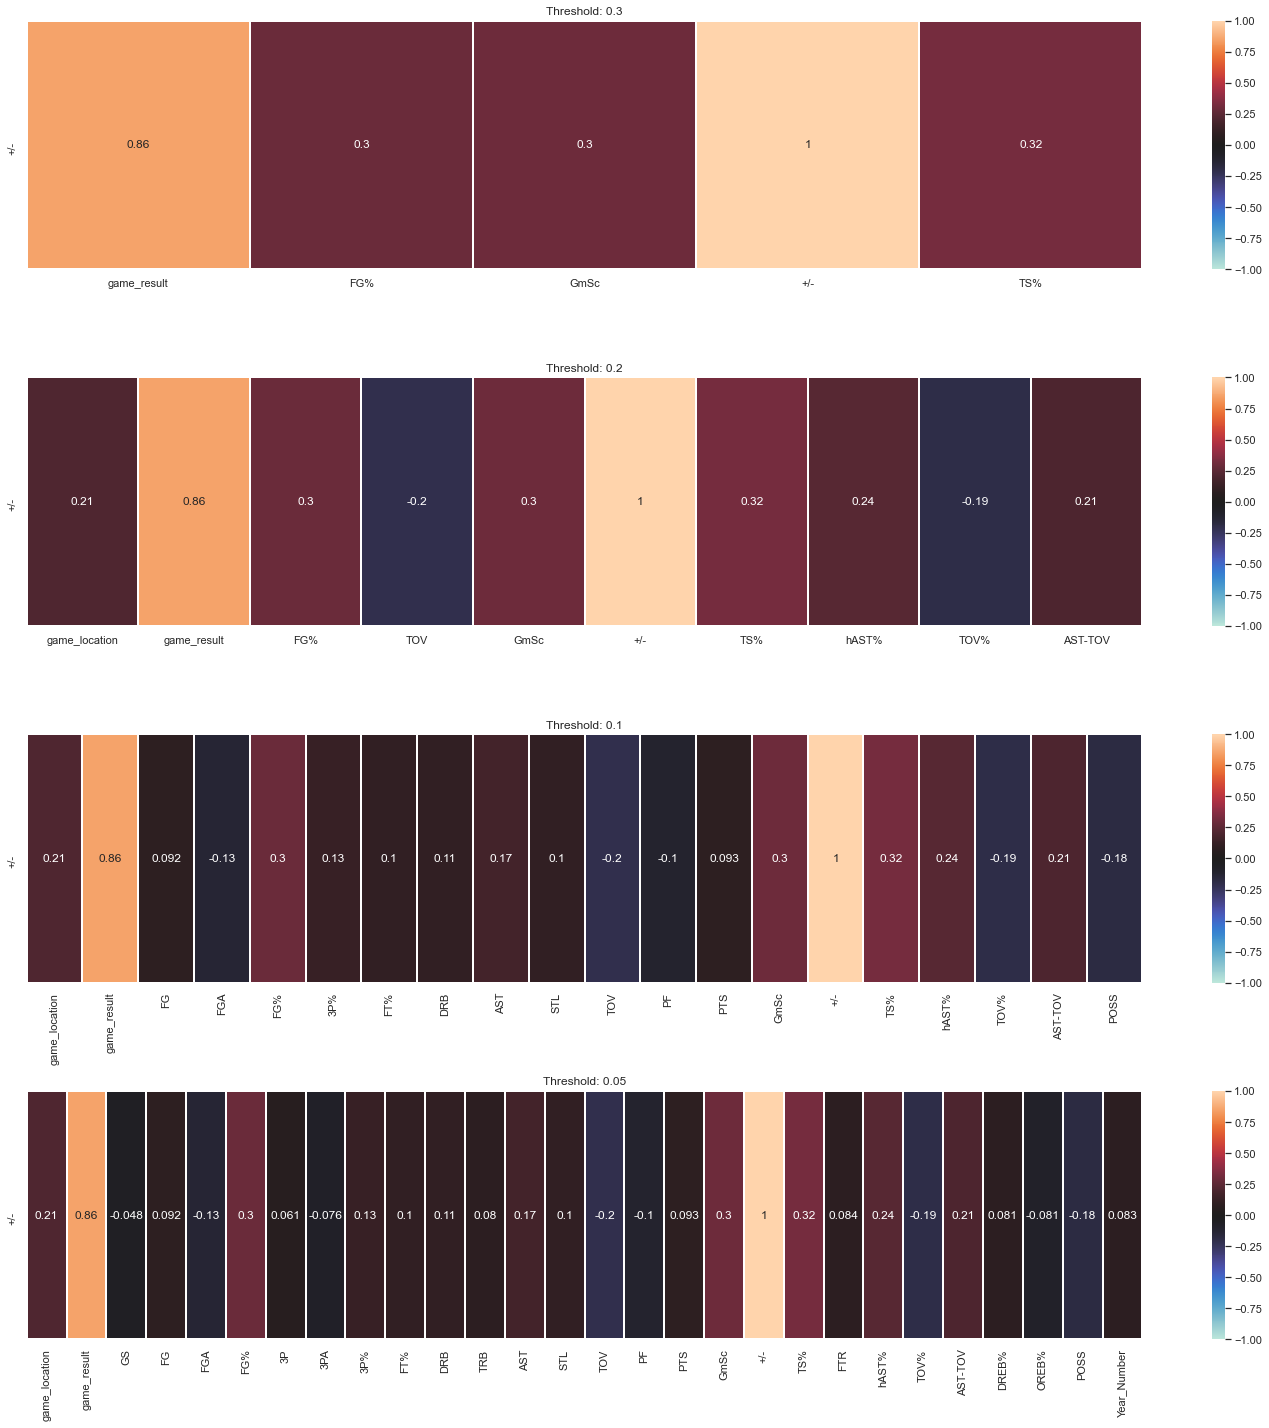

In [360]:
sns.set(font_scale=1)
plt.figure(1,(20,20))
i = 0
epsilon = 0.01
thres_cols = []
for thres in [0.3,0.2,0.1,0.05]:
    i += 1
    ax = plt.subplot(4,1,i)
    corr_above_thres, corr_above_thres_cols = correlation_w_threshold(corr,thres-epsilon,"+/-")
    pair = (thres,corr_above_thres_cols)
    thres_cols.append(pair)
    sns.heatmap(corr_above_thres.T,vmin=-1,vmax=1,center=0,linewidth=1,annot=True,yticklabels=["+/-"],xticklabels=corr_above_thres_cols)
    ax.set_title(f"Threshold: {thres}")
    plt.tight_layout()
plt.show()

In [361]:
full_data.columns

Index(['G', 'Date', 'Age', 'Tm', 'game_location', 'Opp', 'game_result', 'GS',
       'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-',
       'TS%', 'FTR', 'hAST%', 'TOV%', 'AST-TOV', 'DREB%', 'OREB%', 'POSS',
       'Year_Number'],
      dtype='object')

In [368]:
def get_ratios(nums_col, dens_col,df,replace=True,new_col=None,target=None,print_corr_w_target=True):
    vals = []
    for num, den in zip(df[nums_col], df[dens_col]):
        if not den:
            vals.append(float(0))
        else:
            vals.append(num/den)
    vals = np.array(vals)
    if replace:
        df[new_col] = vals
    if print_corr_w_target: 
        corr = np.corrcoef(vals,df[target])[0,1]
        print(f"The correlation between {new_col} and {target} is {corr}")

In [369]:
get_ratios("GmSc","PTS",full_data,new_col="GmSc-Per-PTS",target="+/-")

The correlation between GmSc-Per-PTS and +/- is 0.4286924093014436


In [370]:
get_ratios("GmSc","FT",df=full_data,new_col="GmSc-Per-FT",target="+/-")

The correlation between GmSc-Per-FT and +/- is 0.14145452007874335


In [371]:
get_ratios("FTR","FGA",df=full_data,new_col="FTR-Per-FGA",target="+/-")

The correlation between FTR-Per-FGA and +/- is 0.11669528953805972


In [372]:
get_ratios("PTS","TOV",df=full_data,new_col="PTS-Per-TOV",target="+/-")

The correlation between PTS-Per-TOV and +/- is 0.1321251251557536


In [373]:
get_ratios("PTS","POSS",df=full_data,new_col="PTS-Per-POSS",target="+/-")

The correlation between PTS-Per-POSS and +/- is 0.3548578343826737
